In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.api import ExponentialSmoothing    #Holt Winter Method

In [ ]:
url = 'https://raw.githubusercontent.com/azhar2ds/Time-Series/refs/heads/main/commuters%20of%20JetRail/commuters_of_JetRail.csv'
d = pd.read_csv(url)
train = d[:14736]
val = d[14736:]
train.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14)
val.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14)
plt.show()

In [23]:
d.head(3)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6


In [ ]:
y_hat_avg = val.copy() #This line helps copy the index of the val observations for plotting
model = ExponentialSmoothing(np.asarray(train.Count), seasonal_periods=7*24, trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = model.forecast(len(val))

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(val['Count'], label='Val')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

# MORE DIFFERENT EXPERIMENTAL APPROACH

In [25]:
url = 'https://raw.githubusercontent.com/azhar2ds/Time-Series/refs/heads/main/commuters%20of%20JetRail/commuters_of_JetRail.csv'
df = pd.read_csv(url)


I’m subsetting and aggregating dataset at daily basis to explain the different methods.

Subsetting the dataset from (August 2012 – Dec 2013)
    Creating train and test file for modeling. The first 14 months (August 2012 – October 2013) are used as training data and next 2 months (Nov 2013 – Dec 2013) as testing data.
    Aggregating the dataset at daily basis



In [26]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv(url, nrows = 11856)

#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:10392] 
test=df[10392:]

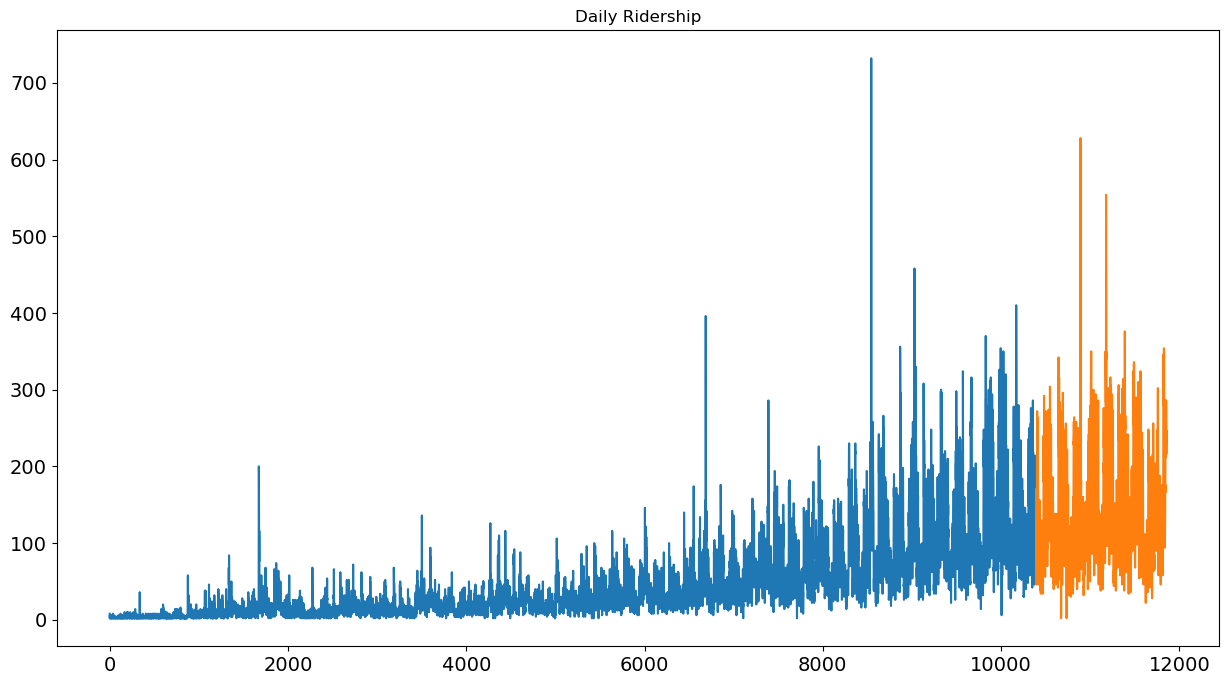

<Figure size 600x300 with 0 Axes>

In [33]:
#Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.figure(figsize=(6,3))
plt.show()

**Method 1: Start with a Naive Approach**

Forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method. Now we will implement the Naive method to forecast the prices for test data.


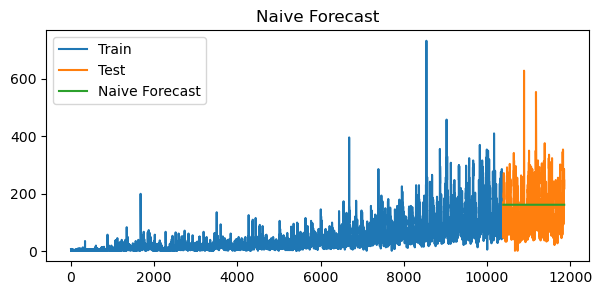

In [32]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(7,3))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()



**Note:** We will now calculate RMSE to check to accuracy of our model on test data set.


In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print('Root Mean Squared Error:',rms)

Root Mean Squared Error: 78.45345980383055




We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. Now we will look at another technique and try to improve our score.


**Method 2: – Simple Average¶**

Forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.


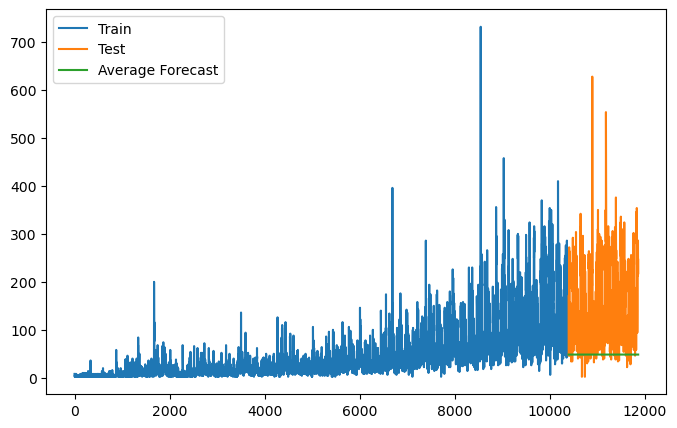

In [37]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(8,5))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

**Note:** We will now calculate RMSE to check to accuracy of our model.


In [38]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

127.25635899369644




We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not.


**Method 3 – Moving Average**

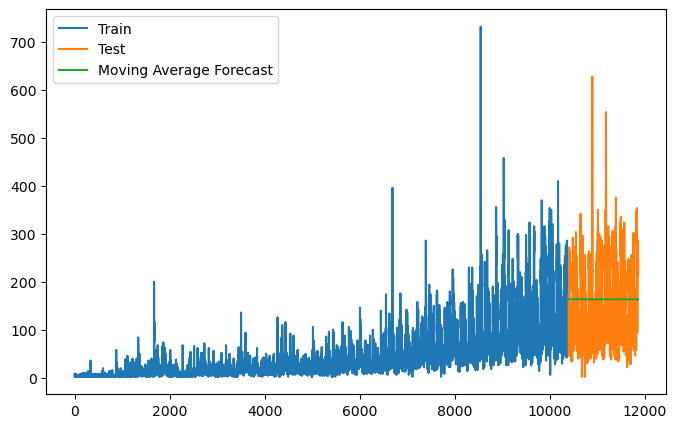

In [39]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(8,5))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

**Note:**  We will now calculate RMSE to check to accuracy of our model.

In [40]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

78.73378411701253




We can see that Naive method outperforms both Average method and Moving Average method for this dataset. Now we will look at Simple Exponential Smoothing method and see how it performs.


**Method 4 – Simple Exponential Smoothing**

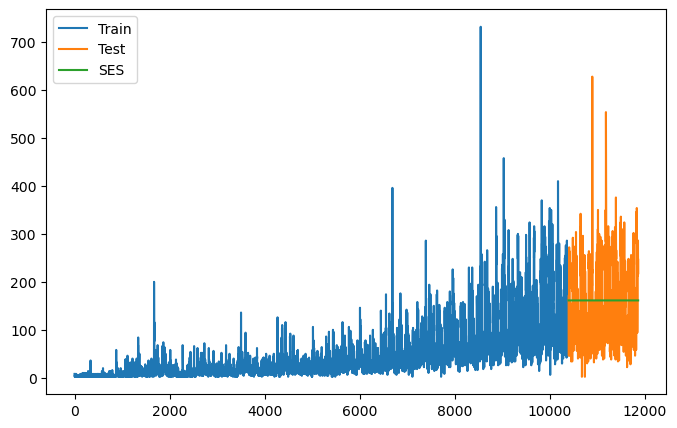

In [42]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test)) # Simple Exponential Smoothing.
plt.figure(figsize=(8,5))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

**Note:** We will now calculate RMSE to check to accuracy of our model.

In [44]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print(rms)

78.3399124367131




We can see that implementing Simple exponential model with **alpha as 0.6** generates a better model till now. We can tune the parameter using the validation set to generate even a better Simple exponential model.


**Method 5 – Holt’s Linear Trend method**

In [48]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

C:\Users\USER\AppData\Local\Temp\ipykernel_12376\3627983870.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


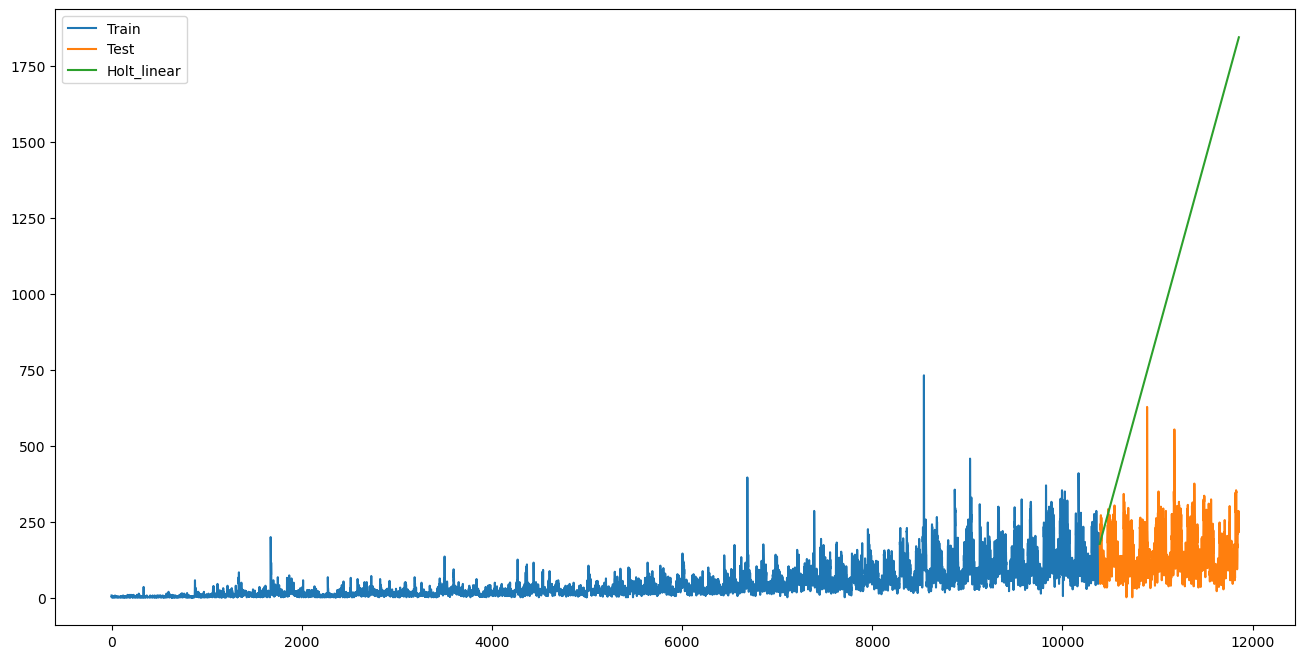

In [49]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

**Note:** We will now calculate RMSE to check to accuracy of our model.

In [50]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print(rms)

986.5018950596406


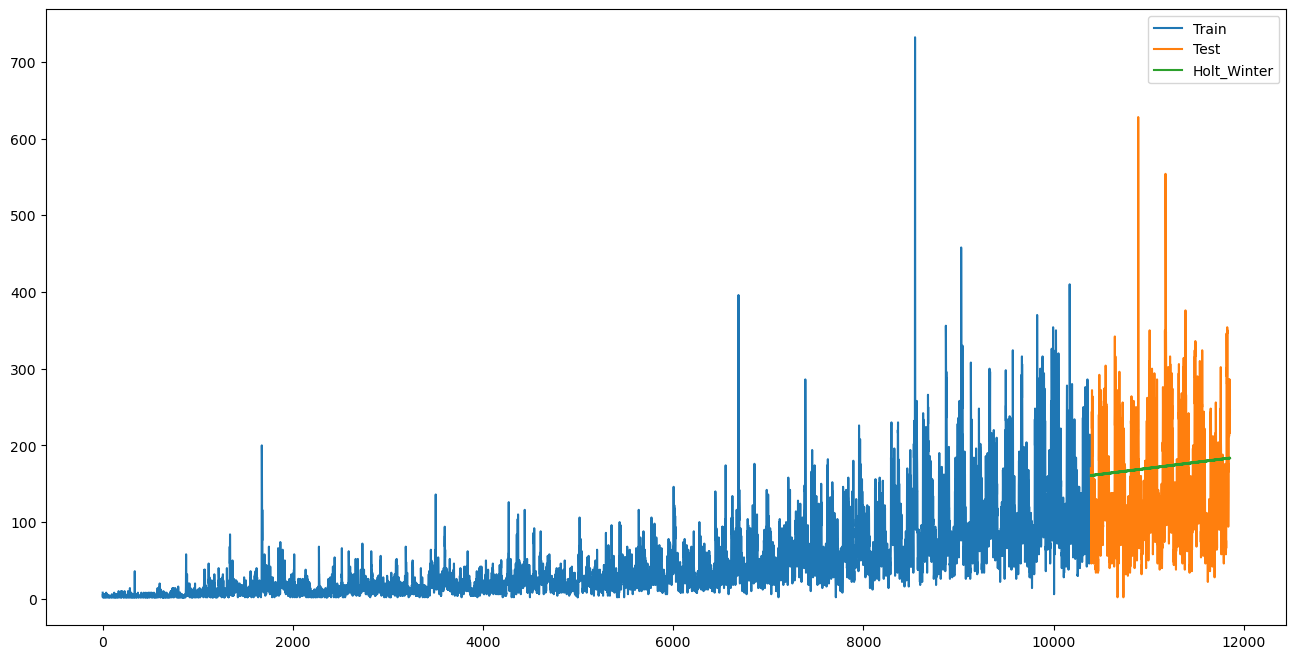

In [51]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()



**Note:** We will now calculate RMSE to check to accuracy of our model.





In [52]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)

80.3977759075331




We can see from the graph that mapping correct trend and seasonality provides a far better solution. We chose seasonal_period = 7 as data repeats itself weekly. Other parameters can be tuned as per the dataset. I have used default parameters while building this model. You can tune the parameters to achieve a better model.


**Method 7 – ARIMA¶**

Another common Time series model that is very popular among the Data scientists is ARIMA. It stand for Autoregressive Integrated Moving average. While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the correlations in the data with each other. An improvement over ARIMA is Seasonal ARIMA. It takes into account the seasonality of dataset just like Holt’ Winter method.


In [53]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'



**Note:** We will now calculate RMSE to check to accuracy of our model.





In [ ]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SARIMA))
print(rms)

Model 	RMSE</br>
Naive Method --> 	43.9</br>
Simple Average -->	109.5</br>
Moving Average -->	46.72</br>
Simple Exponential S. --> 	43.35</br>
Holt's Linear trend -->	43.05</br>
Holt's Winter -->	23.96</br>
ARIMA -->	26.06

**Note:** We can see that using Seasonal ARIMA generates a similar solution as of Holt’s Winter.